# Replica project

### The data

In [5]:
# loading the metadata
%load_ext autoreload
%autoreload 2

import pandas as pd

from tqdm import tqdm
import torch

from glob import glob

from utils import *
from metrics import *
from model_replica import ReplicaNet

import numpy as np

from store_embeddings import *
from utils import * 

path = '/home/guhennec/scratch/2021_Cini/TopologicalAnalysis_Cini/data/'
data_dir = '/scratch/students/schaerf/'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data = pd.read_csv(data_dir + 'full_data.csv').drop(columns=['Unnamed: 0', 'level_0'])
print(data.shape)
data.head()

(6163, 45)


uid_connection  index                               uid  \
0  002ca9c06a704c779e69d93cb4fadaa3    649  45588b4e33444ed8b34c523bac808bc4   
1  0038ab462149452b98a4d7359a06f9f4   1571  ae828b07e4284d80b652206ffb77278a   
2  00474897de044f7fb1ef16888dc198f3   1107  76b2c4aeab404bc79768117e3ddc62b1   
3  009c03c265b8418495da038bc3826bf7   1764  c5839e5220e5419e92d878396b0c04bb   
4  00aeddb93a8a4120aa984eda6c822747    747  4d02860f58f2443ba4d1ef088756f854   

  Drawer ImageNumber                         Author  \
0   158B         556    TIZIANO Vecellio (copia da)   
1   158C         120    TIZIANO Vecellio (copia da)   
2    47A         858  BELLINI Giovanni (cerchia di)   
3   135C          57                     SEC XVI ex   
4    21C         228                BASSANO Leandro   

                                    Description  \
0               S.Mariá Maddalena. cm. 123 x 91   
1  Morte di S. Pietro Martire. mm. 123,8 x 84,2   
2                                        Pietà.   
3          Un soffitto. Part.: Leda e il cigno.   
4  La preparazione del pranzo. cm. 88,3 x 102,9   

                     AuthorOriginal    AuthorULANLabel      AuthorULAN  ...  \
0              TIZIANO (copia da -)             Titian  ulan:500031075  ...   
1              TIZIANO (copia da -)             Titian  ulan:500031075  ...   
2  BELLINI, Giovanni (cerchia di -)  Bellini, Giovanni  ulan:500019244  ...   
3                      SEC. XVI ex.                NaN             NaN  ...   
4                 BASSANO, Leandro.   Bassano, Leandro  ulan:500015945  ...   

      AuthorBirthCity  AuthorDeathCity  \
0             Belluno           Venice   
1             Belluno           Venice   
2              Venice           Venice   
3                 NaN              NaN   
4  Bassano del Grappa           Venice   

                                        CardboardURL  \
0  https://dhlabsrv4.epfl.ch/iiif_cini/158B%2F158...   
1  https://dhlabsrv4.epfl.ch/iiif_cini/158C%2F158...   
2  https://dhlabsrv4.epfl.ch/iiif_cini/47A%2F47A_...   
3  https://dhlabsrv4.epfl.ch/iiif_cini/135C%2F135...   
4  https://dhlabsrv4.epfl.ch/iiif_cini/21C%2F21C_...   

                                            ImageURL  \
0  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
1  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
2  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
3  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
4  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   

                               img1                              img2  \
0  45588b4e33444ed8b34c523bac808bc4  da54c106180449d1a52993e9a5bc17fd   
1  ae828b07e4284d80b652206ffb77278a  ea64207684694d379579998f88b7c29a   
2  76b2c4aeab404bc79768117e3ddc62b1  b8dd2c0c2c7146e68e5bbb0aaf6cf803   
3  450ee2aceb014709b23a93e1163937c5  c5839e5220e5419e92d878396b0c04bb   
4  4d02860f58f2443ba4d1ef088756f854  27bad0f213a342c3987e8cec61e40550   

       type                         annotated cluster    set  
0  POSITIVE  2018-07-24 14:58:44.559049+00:00    50.0  train  
1  POSITIVE  2018-07-16 09:47:57.987515+00:00    51.0   test  
2  POSITIVE  2018-03-14 10:46:45.603341+00:00   498.0   test  
3  POSITIVE  2018-05-07 08:28:11.797723+00:00    92.0  train  
4  POSITIVE  2018-03-23 15:41:53.094226+00:00   218.0  train  

[5 rows x 45 columns]

### Creating embeddings of all the images

In [26]:
img = preprocess_image(data_dir + 'subset/' + data['uid'][0] + '.jpg')
newmodel = create_model('resnet50', 'max')
embedding = get_embedding(img, newmodel, type='pretrained').squeeze(1).squeeze(1)
print(embedding.shape)
embedding

(2048,)


array([0.02336305, 0.02614439, 0.02306097, ..., 0.01509568, 0.01795762,
       0.0170189 ], dtype=float32)

In [27]:
newmodel = create_model('resnet50', 'max')
embeddings = [[uid, get_embedding(preprocess_image(data_dir + 'subset/' + uid + '.jpg'), newmodel).squeeze(1).squeeze(1)] for uid in tqdm(data['uid'].unique())]

100%|██████████| 4357/4357 [23:13<00:00,  3.13it/s]


In [ ]:
np.save('resnet50_max_480.npy', np.array(embeddings, dtype=np.ndarray))

In [7]:
embeddings = np.load(data_dir + 'resnet50_max_240.npy', allow_pickle=True)
embeddings

array([['45588b4e33444ed8b34c523bac808bc4',
        array([0.01273958, 0.02077351, 0.02422727, ..., 0.01849872, 0.02054269,
       0.01348173], dtype=float32)],
       ['ae828b07e4284d80b652206ffb77278a',
        array([0.01653748, 0.02765266, 0.02819748, ..., 0.01199384, 0.01694367,
       0.01413397], dtype=float32)],
       ['76b2c4aeab404bc79768117e3ddc62b1',
        array([0.01377614, 0.02740756, 0.02341555, ..., 0.01013662, 0.01947277,
       0.01492655], dtype=float32)],
       ...,
       ['ffd362f3b0f64665a6d4708b62c6333c',
        array([0.01821662, 0.01876744, 0.0185441 , ..., 0.01633258, 0.02021206,
       0.01388135], dtype=float32)],
       ['ffd9ce3649364906810269748b8a5ddc',
        array([0.01877906, 0.0240321 , 0.02262984, ..., 0.01359423, 0.01878336,
       0.01530929], dtype=float32)],
       ['fffb47ce9194475087f2c7dc1eaaa41a',
        array([0.02208385, 0.02518187, 0.02769189, ..., 0.01206282, 0.02445544,
       0.01236099], dtype=float32)]], dtype=object)

### Finding most similar embeddings

In [7]:
list_downloaded = [
    file.split("/")[-1].split(".")[0] for file in glob(data_dir + "subset/*")
]
print(len(list_downloaded))

train_test = data[data["set"].notnull()].reset_index() #[data['img1'].isin(list_downloaded)][data['img2'].isin(list_downloaded)]
print(train_test.shape)


4593
(2862, 46)


In [34]:

for model in ['resnext-101',]: #, "efficientnet0", "efficientnet7" 'densenet161',==3 dimensions?? 'regnet_x_32gf', 'resnet101', 'resnet152',
    for pool in ["avg"]: #, "max"
        for resolution in ["480"]: #"240", 
            print(model, pool, resolution)
            embeddings = np.load(
                data_dir + model + "_" + pool + "_" + resolution + ".npy",
                allow_pickle=True,
            )        
            embs = get_lower_dimension(embeddings, dimensions=500, method='pca')
            embeddings_new = np.array([[embeddings[i, 0], embs[i]] for i in range(len(embs))], dtype=np.ndarray)
            #embs = get_lower_dimension_(embeddings, dimensions=500, method='svd')
            #embeddings_new_2 = np.array([[embeddings[i, 0], embs[i]] for i in range(len(embs))], dtype=np.ndarray)
            print('original scores')
            get_scores(embeddings, train_test, data, list_downloaded)
            print('dimensionality reduction scores 500')
            get_scores(embeddings_new, train_test, data, list_downloaded)
            print('\n\n\n\n')
            #print('dimensionality reduction scores 250')
            #get_scores(embeddings_new_2, train_test, data, list_downloaded)
            
            

resnext-101 avg 480
original scores


100%|██████████| 2862/2862 [00:10<00:00, 264.29it/s]


all positions 285.85919196748745
min positions 119.34677419354838
median positions 327.06129032258065
mean average precision 0.12329775891310613
recall @ 400 0.5398380696364568
recall @ 200 0.4330619559651818
recall @ 100 0.35111111111111115
recall @ 50 0.26671786994367636
recall @ 20 0.20953661034306195
dimensionality reduction scores 500


100%|██████████| 2862/2862 [00:04<00:00, 598.20it/s]


all positions 285.9364092756395
min positions 122.48064516129033
median positions 326.375
mean average precision 0.11995235624837938
recall @ 400 0.5404723502304147
recall @ 200 0.4294457245263697
recall @ 100 0.3490610599078341
recall @ 50 0.27234383000512036
recall @ 20 0.2022337429595494







In [7]:
device = 'cuda'
model = ReplicaNet('resnext-101', device)
model.load_state_dict(torch.load(data_dir + "model_weights_" + 'resnext-101'))

<All keys matched successfully>

In [ ]:
embeddings = [[uid, get_embedding(preprocess_image(data_dir + 'subset/' + uid + '.jpg', resolution=360), model, device).squeeze(1).squeeze(1)] for uid in tqdm(data['uid'].unique())]

In [12]:
np.save(data_dir + 'resnext-101_epoch_6.npy', np.array(embeddings, dtype=np.ndarray))

In [4]:
for model in ['resnext-101',]: 
    for pool in ["avg"]: 
        for resolution in ["360"]: 
            for epoch in ['1']:      #, '6'      
                print(model, pool, resolution, 'epoch ', epoch)
                embeddings = np.load(
                    data_dir + 'embeddings/resnext-101_epoch_' + epoch + ".npy",
                    allow_pickle=True,
                )        
                print('original scores')
                get_scores(embeddings, train_test, data, list_downloaded)
            

resnext-101 avg 360 epoch  1
original scores


100%|██████████| 2862/2862 [00:10<00:00, 278.31it/s]


all positions 267.6495338273966
min positions 89.64354838709677
median positions 307.26451612903224
mean average precision 0.17015603007121957
recall @ 400 0.6022113415258576
recall @ 200 0.5179115463389657
recall @ 100 0.4260835893497184
recall @ 50 0.34440028161802355
recall @ 20 0.28553443420378904


In [4]:
embeddings = np.load(
                    data_dir + 'embeddings/resnext-101_avg_480' + ".npy",
                    allow_pickle=True,
                )        
embeddings.shape

get_scores(embeddings, train_test, data, list_downloaded)

100%|██████████| 2862/2862 [00:10<00:00, 264.86it/s]


all positions 285.85919196748745
min positions 119.34677419354838
median positions 327.06129032258065
mean average precision 0.12329775891310613
recall @ 400 0.5398380696364568
recall @ 200 0.4330619559651818
recall @ 100 0.35111111111111115
recall @ 50 0.26671786994367636
recall @ 20 0.20953661034306195


(285.85919196748745,
 119.34677419354838,
 327.06129032258065,
 0.12329775891310613,
 0.5398380696364568,
 0.4330619559651818,
 0.35111111111111115,
 0.26671786994367636,
 0.20953661034306195)

In [8]:
embeddings = np.load(path + 'Replica_UIDs_ResNet_VGG_All.npy',allow_pickle=True)
print(embeddings.shape)
embeddings = embeddings[np.isin(embeddings[:,0], list(data["uid"].unique()))]

embeddings.shape

(329480, 3)


(4357, 3)

In [9]:
embeddings = embeddings[:,:2]#[order]
embeddings.shape

(4357, 2)

In [10]:
np.save(data_dir + 'embeddings/benoit.npy', embeddings)

In [11]:
get_scores(embeddings, train_test, data, list_downloaded, True)

[(0, '0aa7f536ffae4ba4ac47938f8ce3e397'), (1, '30a58b0b980040b698a9e90aa493aad3'), (2, '392cf510e552449c9c2d3d5a8e3368f4'), (3, 'e6b4993ef5a440a5a589fad5ee52aac6'), (4, '56dc1806903d4f49a09f5b947738d90e'), (5, '47fe31663b6f4c02b3b7e7218a98bf6a'), (6, '6b91df842dce4117b1caea88f45e44a1'), (7, 'f9d0465945d0477d94c4f21872f30205'), (8, '39abfe2440c44d24914b439a3b4ae694'), (9, '92e28c635cf04ba9a5868d816b157693')]


100%|██████████| 2862/2862 [00:12<00:00, 232.07it/s]


all positions 171.7779105904853
min positions 43.262903225806454
median positions 173.16370967741935
mean average precision 0.5398631955614576
recall @ 400 0.8570922939068099
recall @ 200 0.8272791858678954
recall @ 100 0.7868381976446492
recall @ 50 0.7304032258064516
recall @ 20 0.6659901433691756


(171.7779105904853,
 43.262903225806454,
 173.16370967741935,
 0.5398631955614576,
 0.8570922939068099,
 0.8272791858678954,
 0.7868381976446492,
 0.7304032258064516,
 0.6659901433691756)

In [10]:
final = make_training_set_orig(embeddings, train_test, data, data_dir, n=2)
final.sample(5)

100%|██████████| 2862/2862 [00:35<00:00, 80.08it/s]

2862
(2792, 4)


A                                 B  \
2288  fce588c0253e47518e975e5cb555e8a8  1bc3bd59f2e4406ab150ada132ad9171   
2137  5517afb357c340e992c5f7e81c1f63d7  179de993c19543babf3508a668c9329a   
1414  ae79feb06e024fca8d9713da23698767  b87900df4bcb46b780a5a06ccafb5447   
1854  5d79b149cf7445a4bfdf23d9b798a68c  066c36f2a35f4ba583e7796a212203f1   
294   ba9ea6d7c94741ae839dfa5a3e843dc9  5e11887c56114a93a52ab33a3a59c780   

                                     C    set  
2288  5a74a04f32e540b19b50f3d0575a96cc   test  
2137  884b9275ec7a4b32813c817102a2e9b9  train  
1414  dcd275a84f824ee6b2e006e8fd0f7dbf  train  
1854  2a6bc15814964956a95bb30e7bb4fede   test  
294   aa7426ea130340f983f3bc696c0c072e  train

/tmp/ipykernel_2053885/3743059868.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  show_similars(train_test[train_test['set'] == 'test'][train_test['uid'].isin(list_downloaded)].sample(), embeddings, train_test, data)


reference image b51478a010284eceabd16b16068b7d61 PITTORE VENEZIANO SEC. XIX in. Ritratto em. 65 x 48


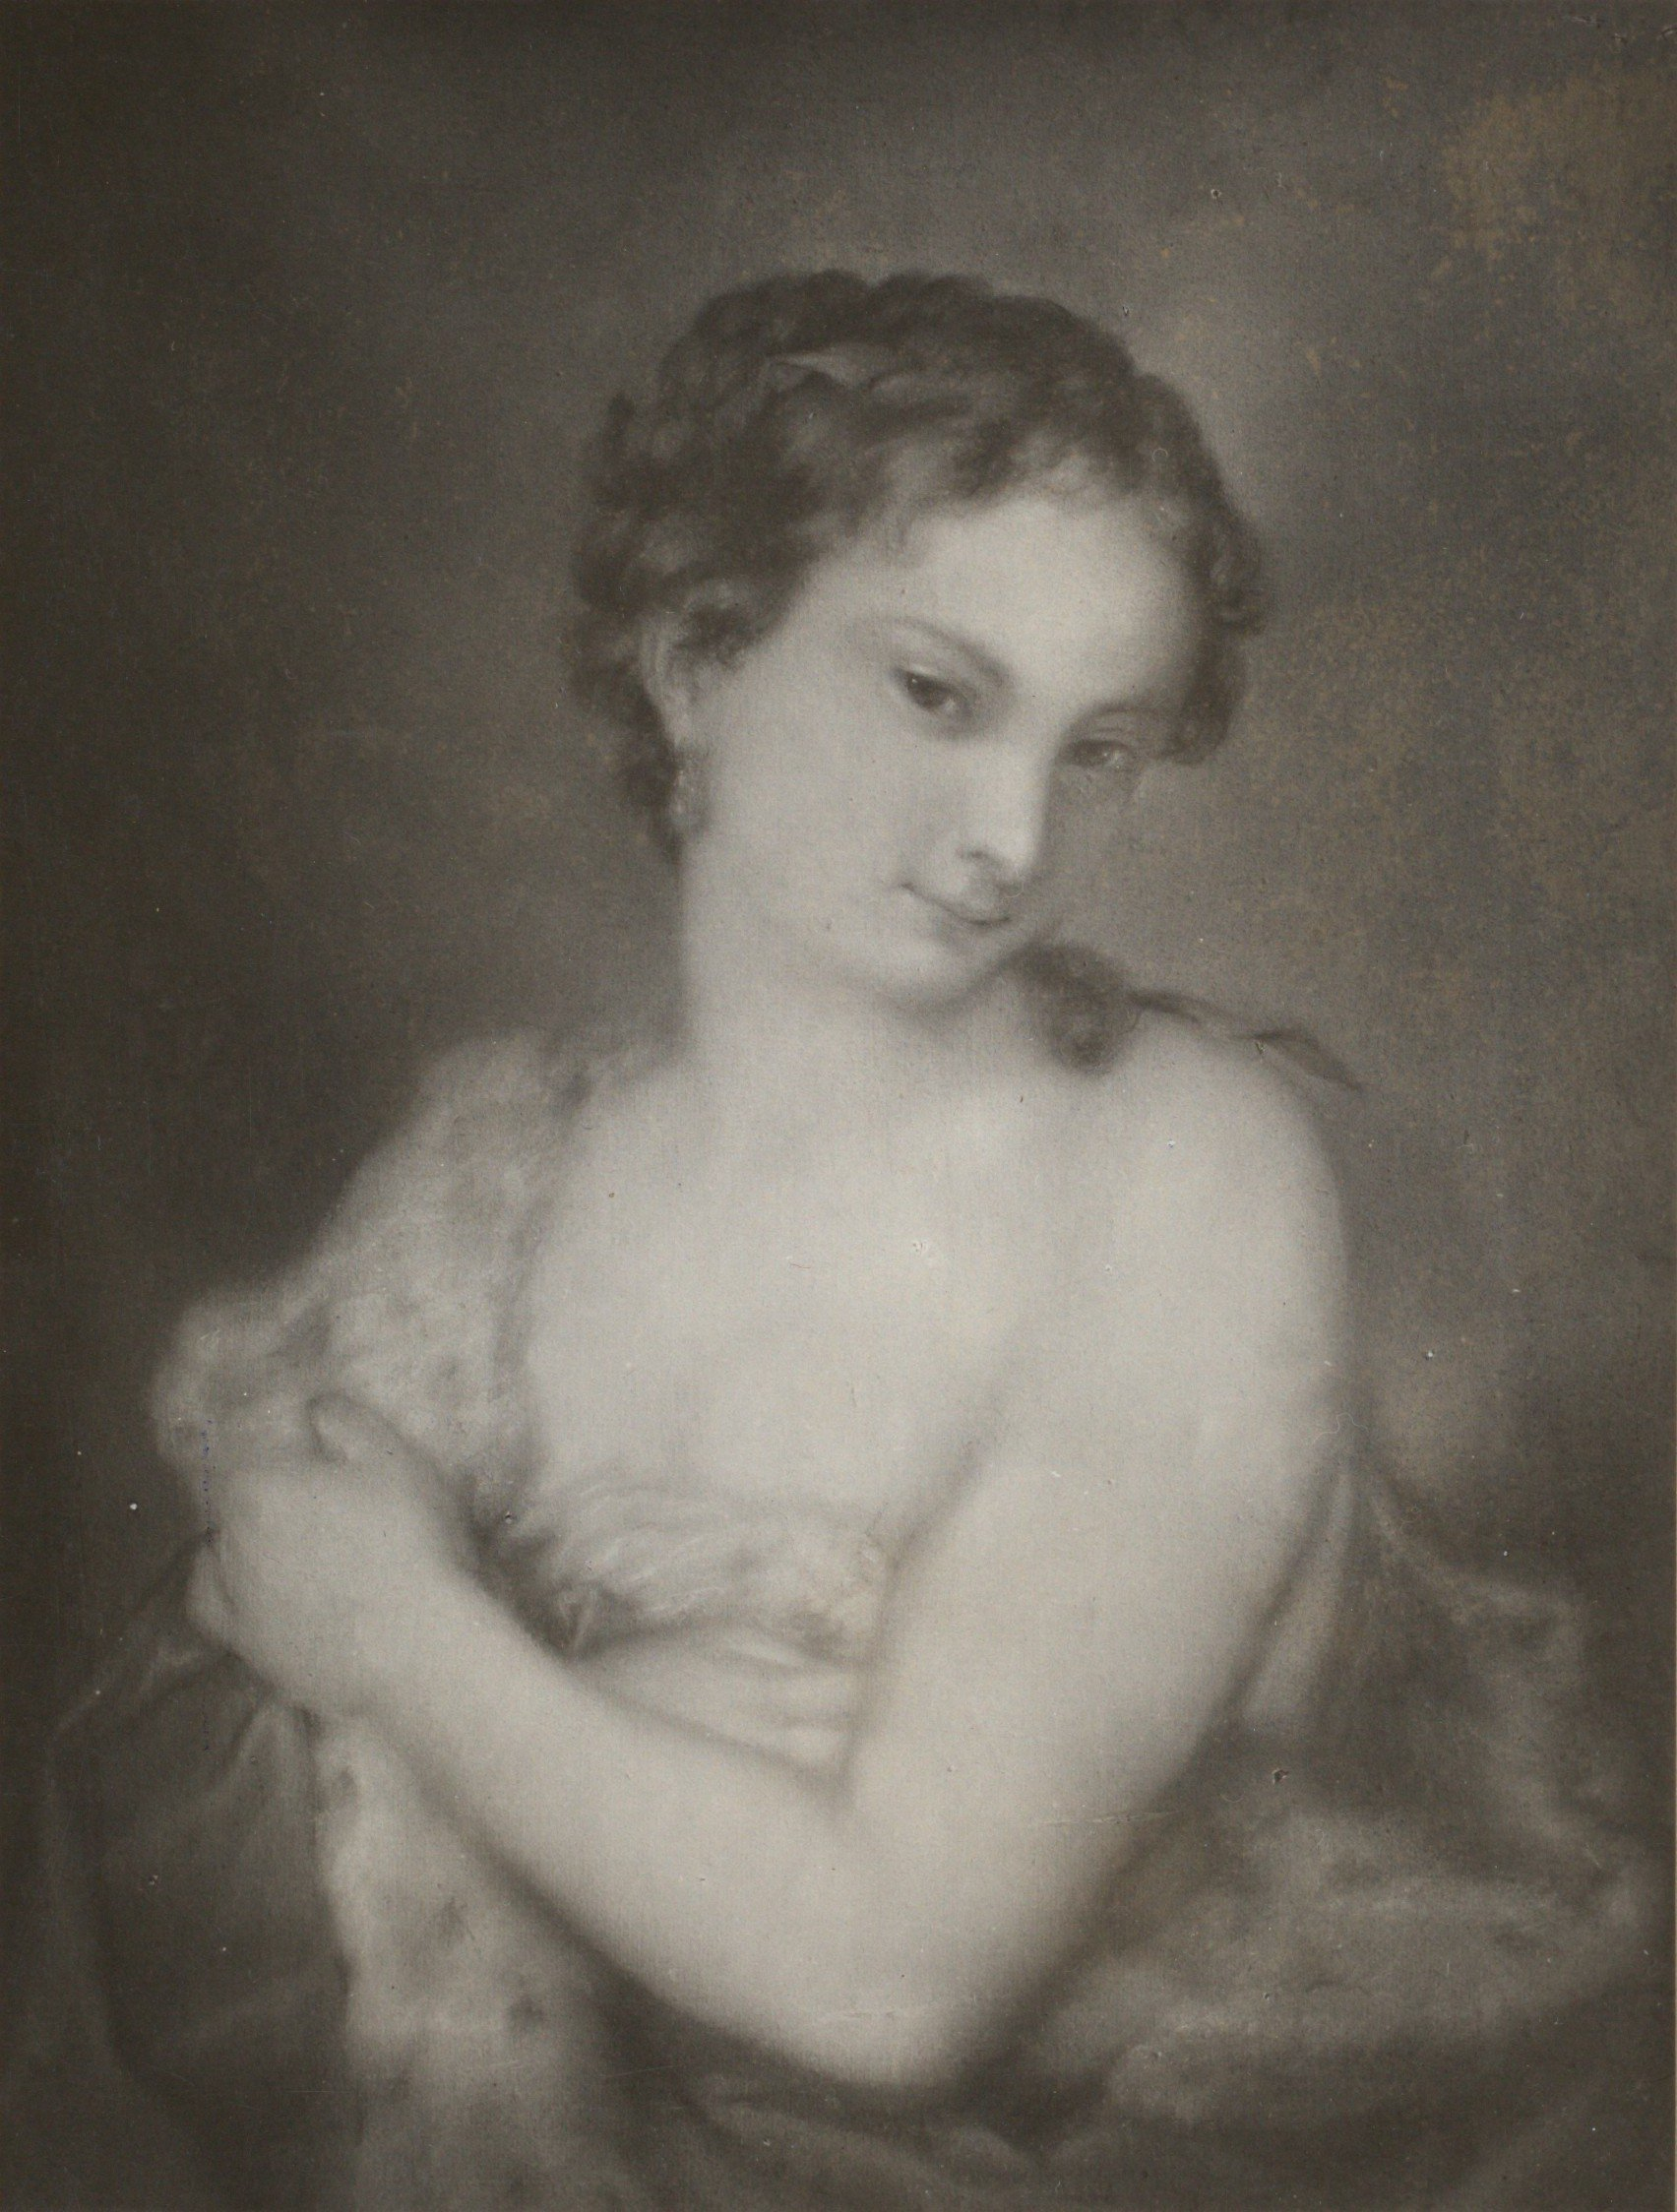

actual most similar image 90897ebddb26472e8c6f6222632f8e62


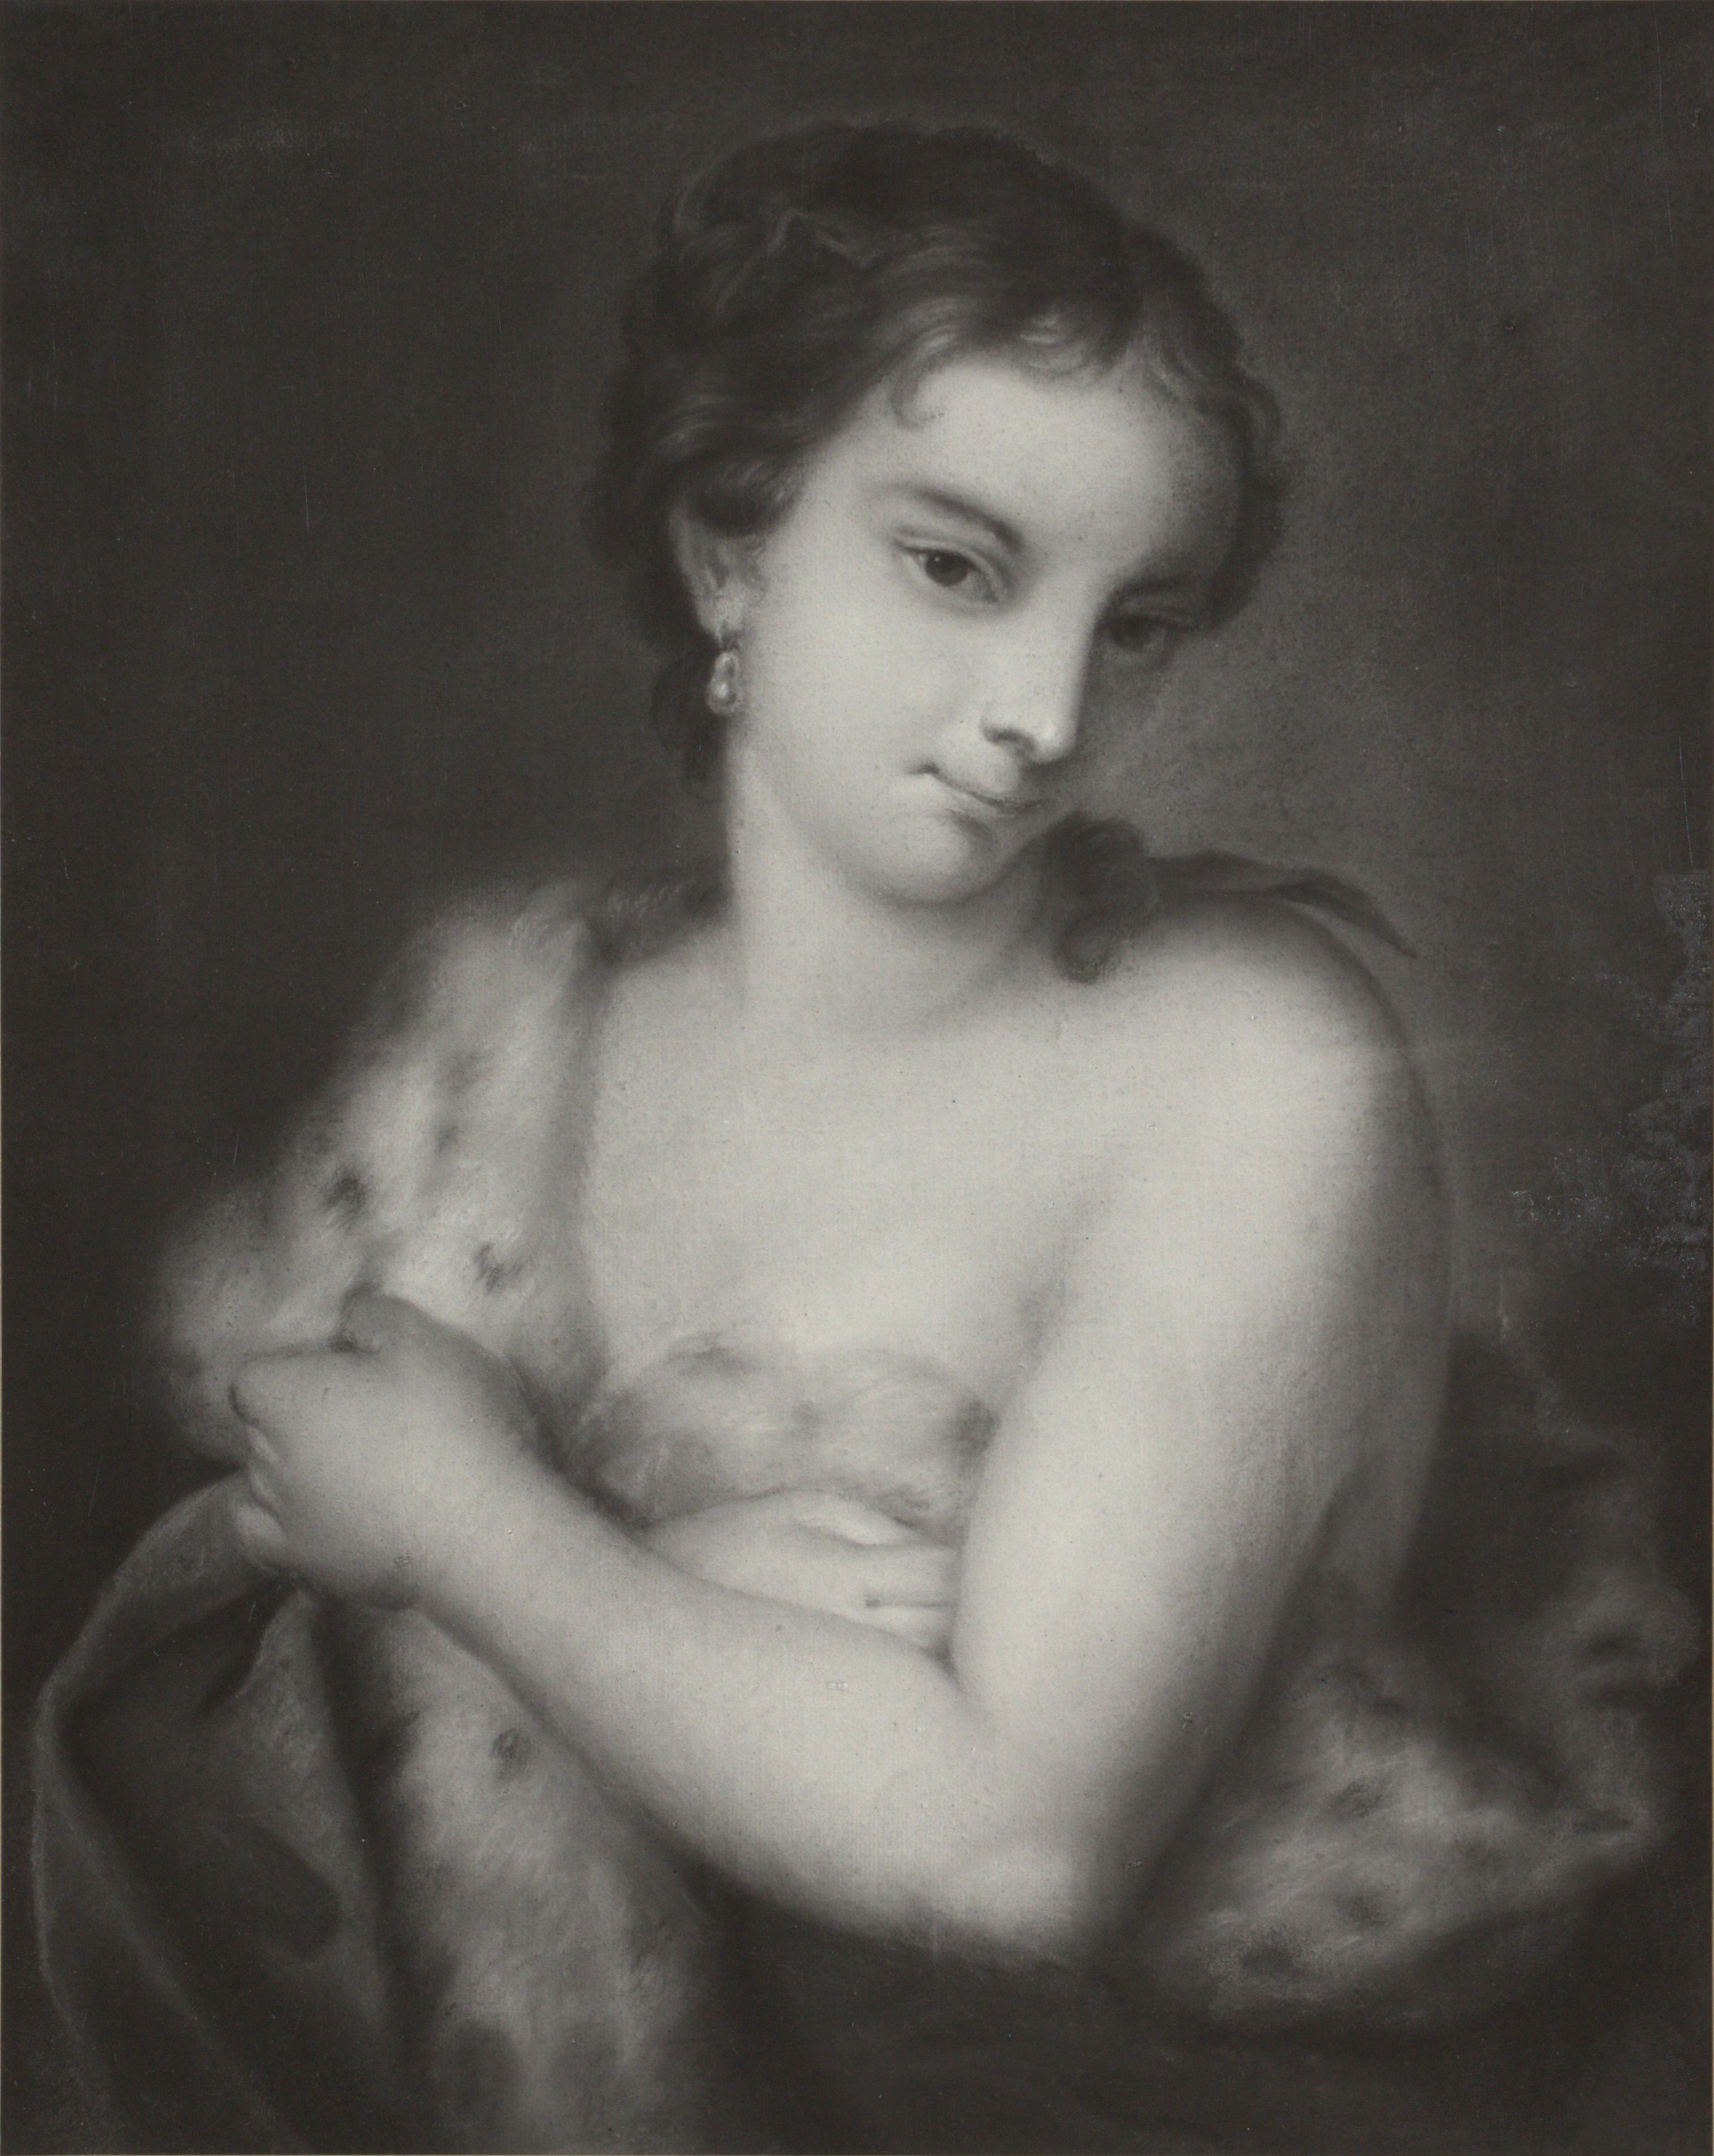

1 th most similar image according to model 72e197b16efe4983b42d77dda900d1e7


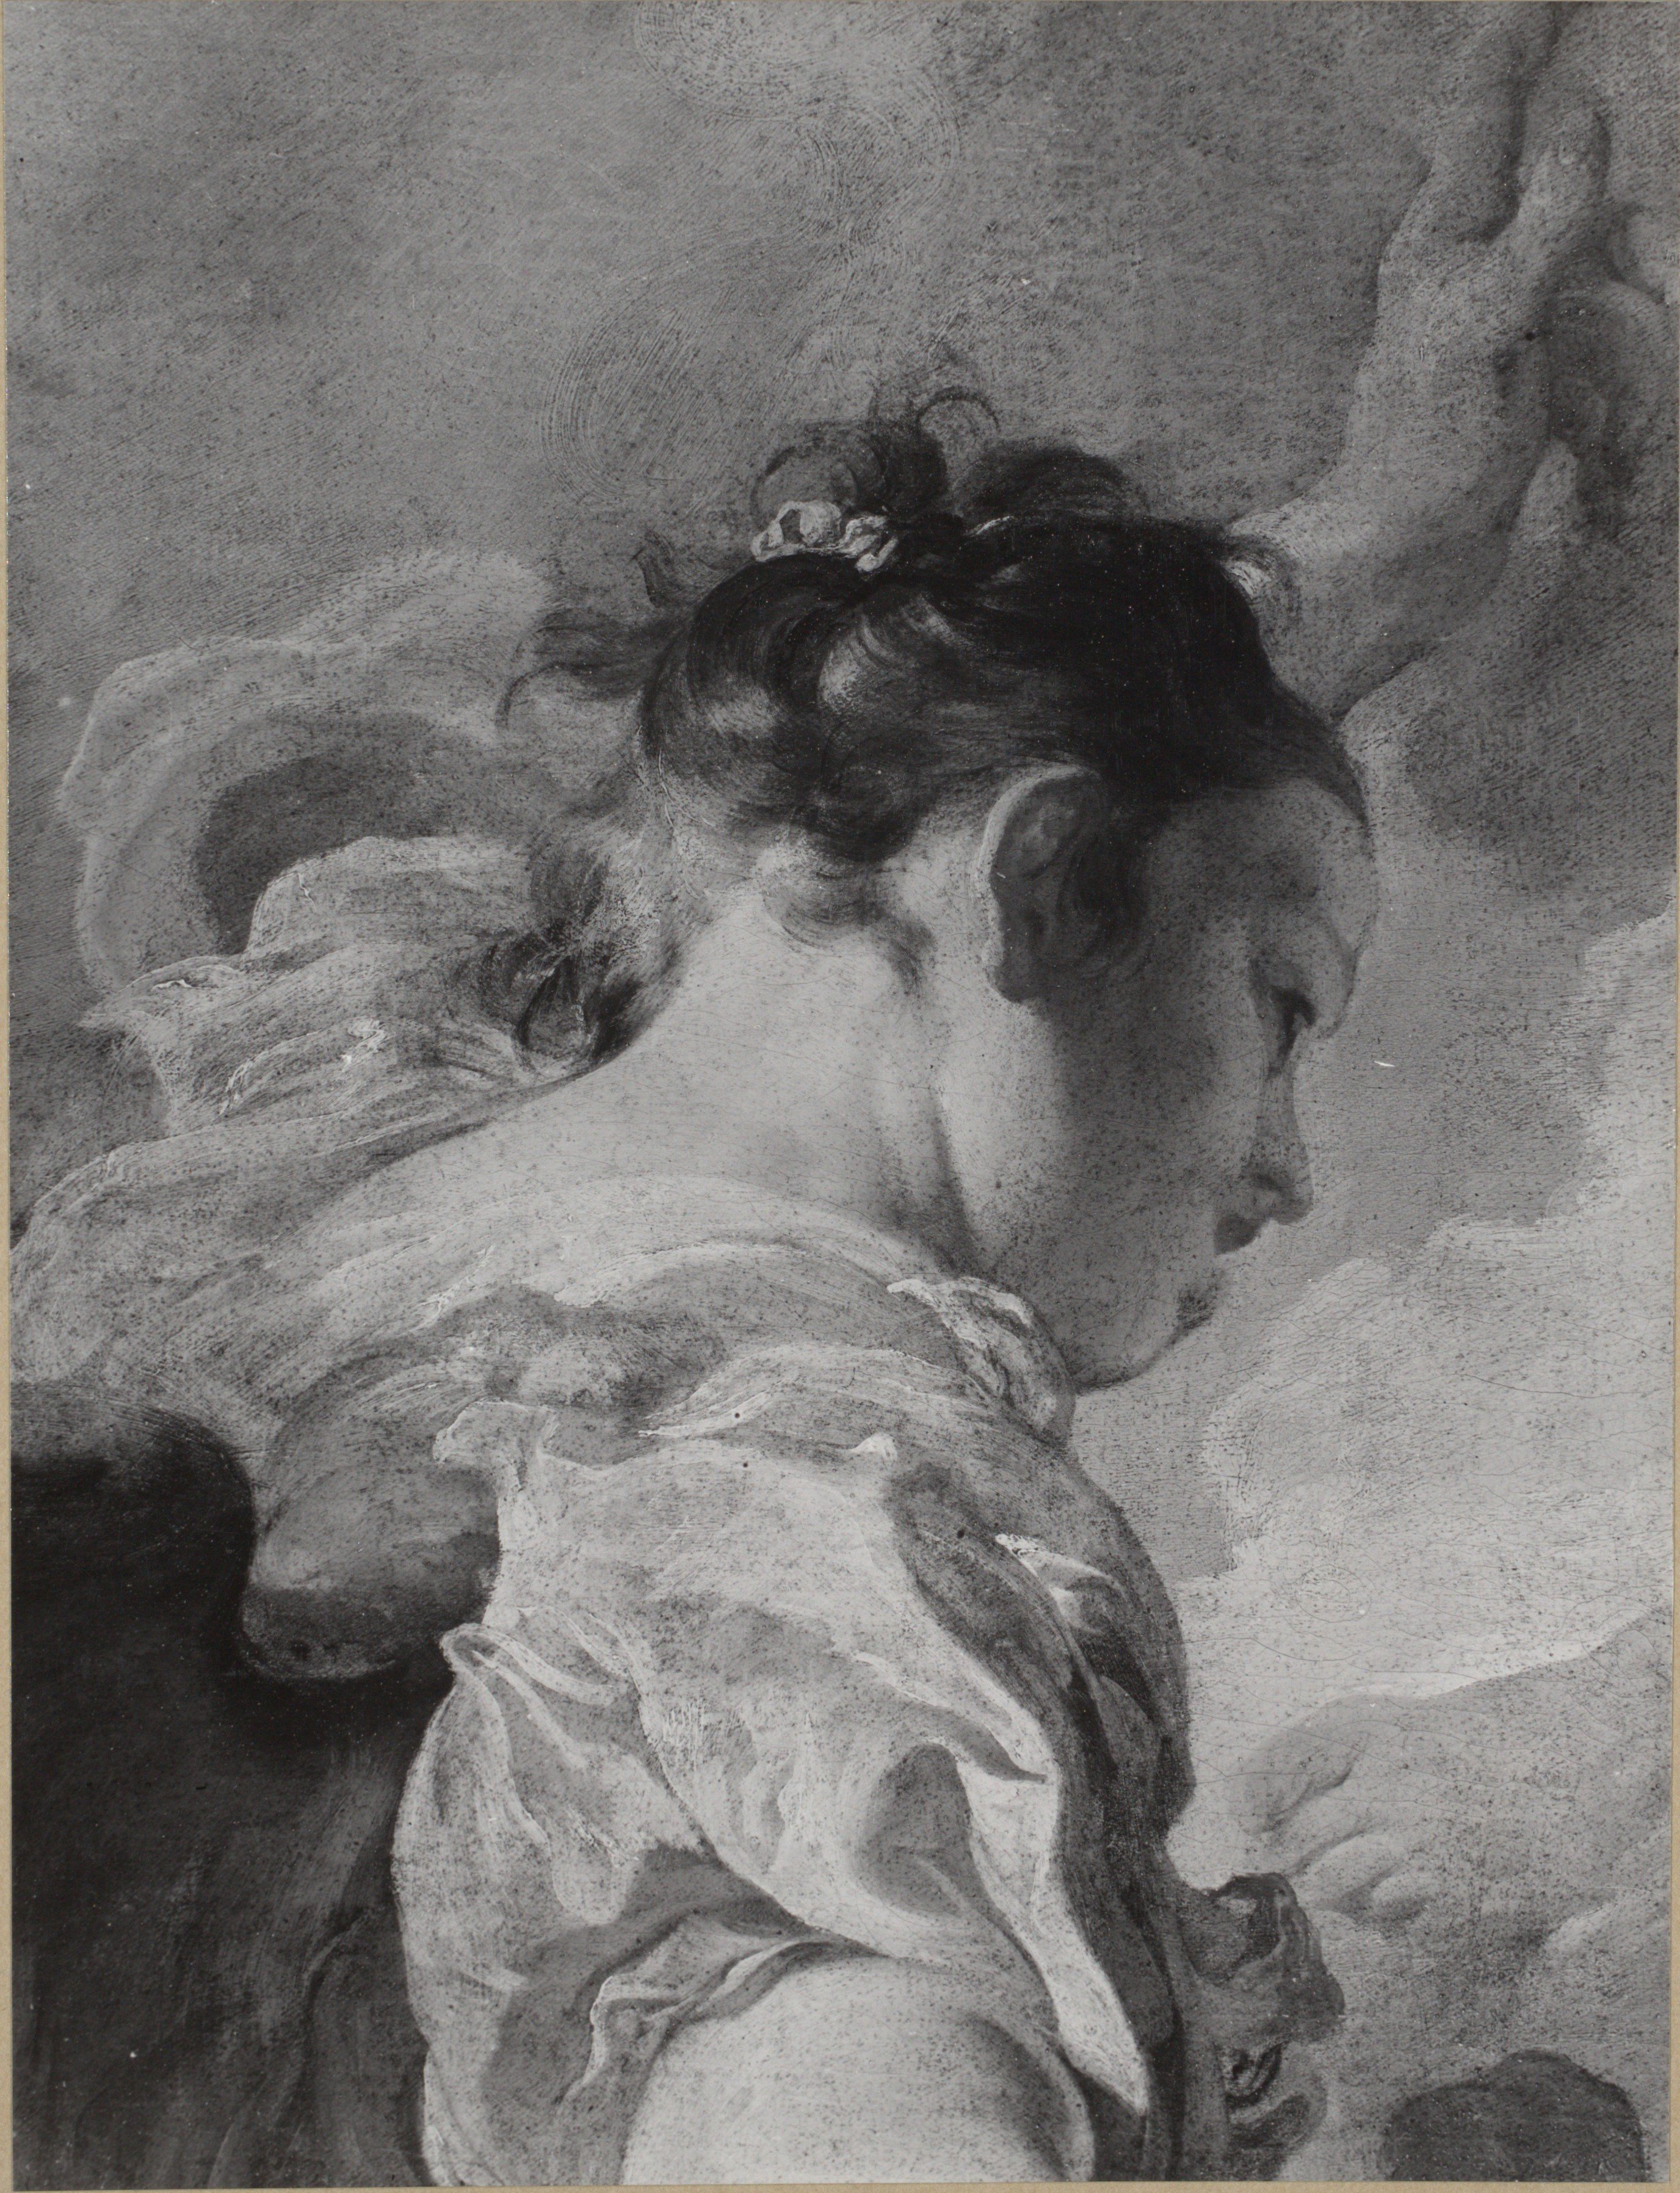

2 th most similar image according to model 8ca0ac2257a440548ca3f1a2b4556f78


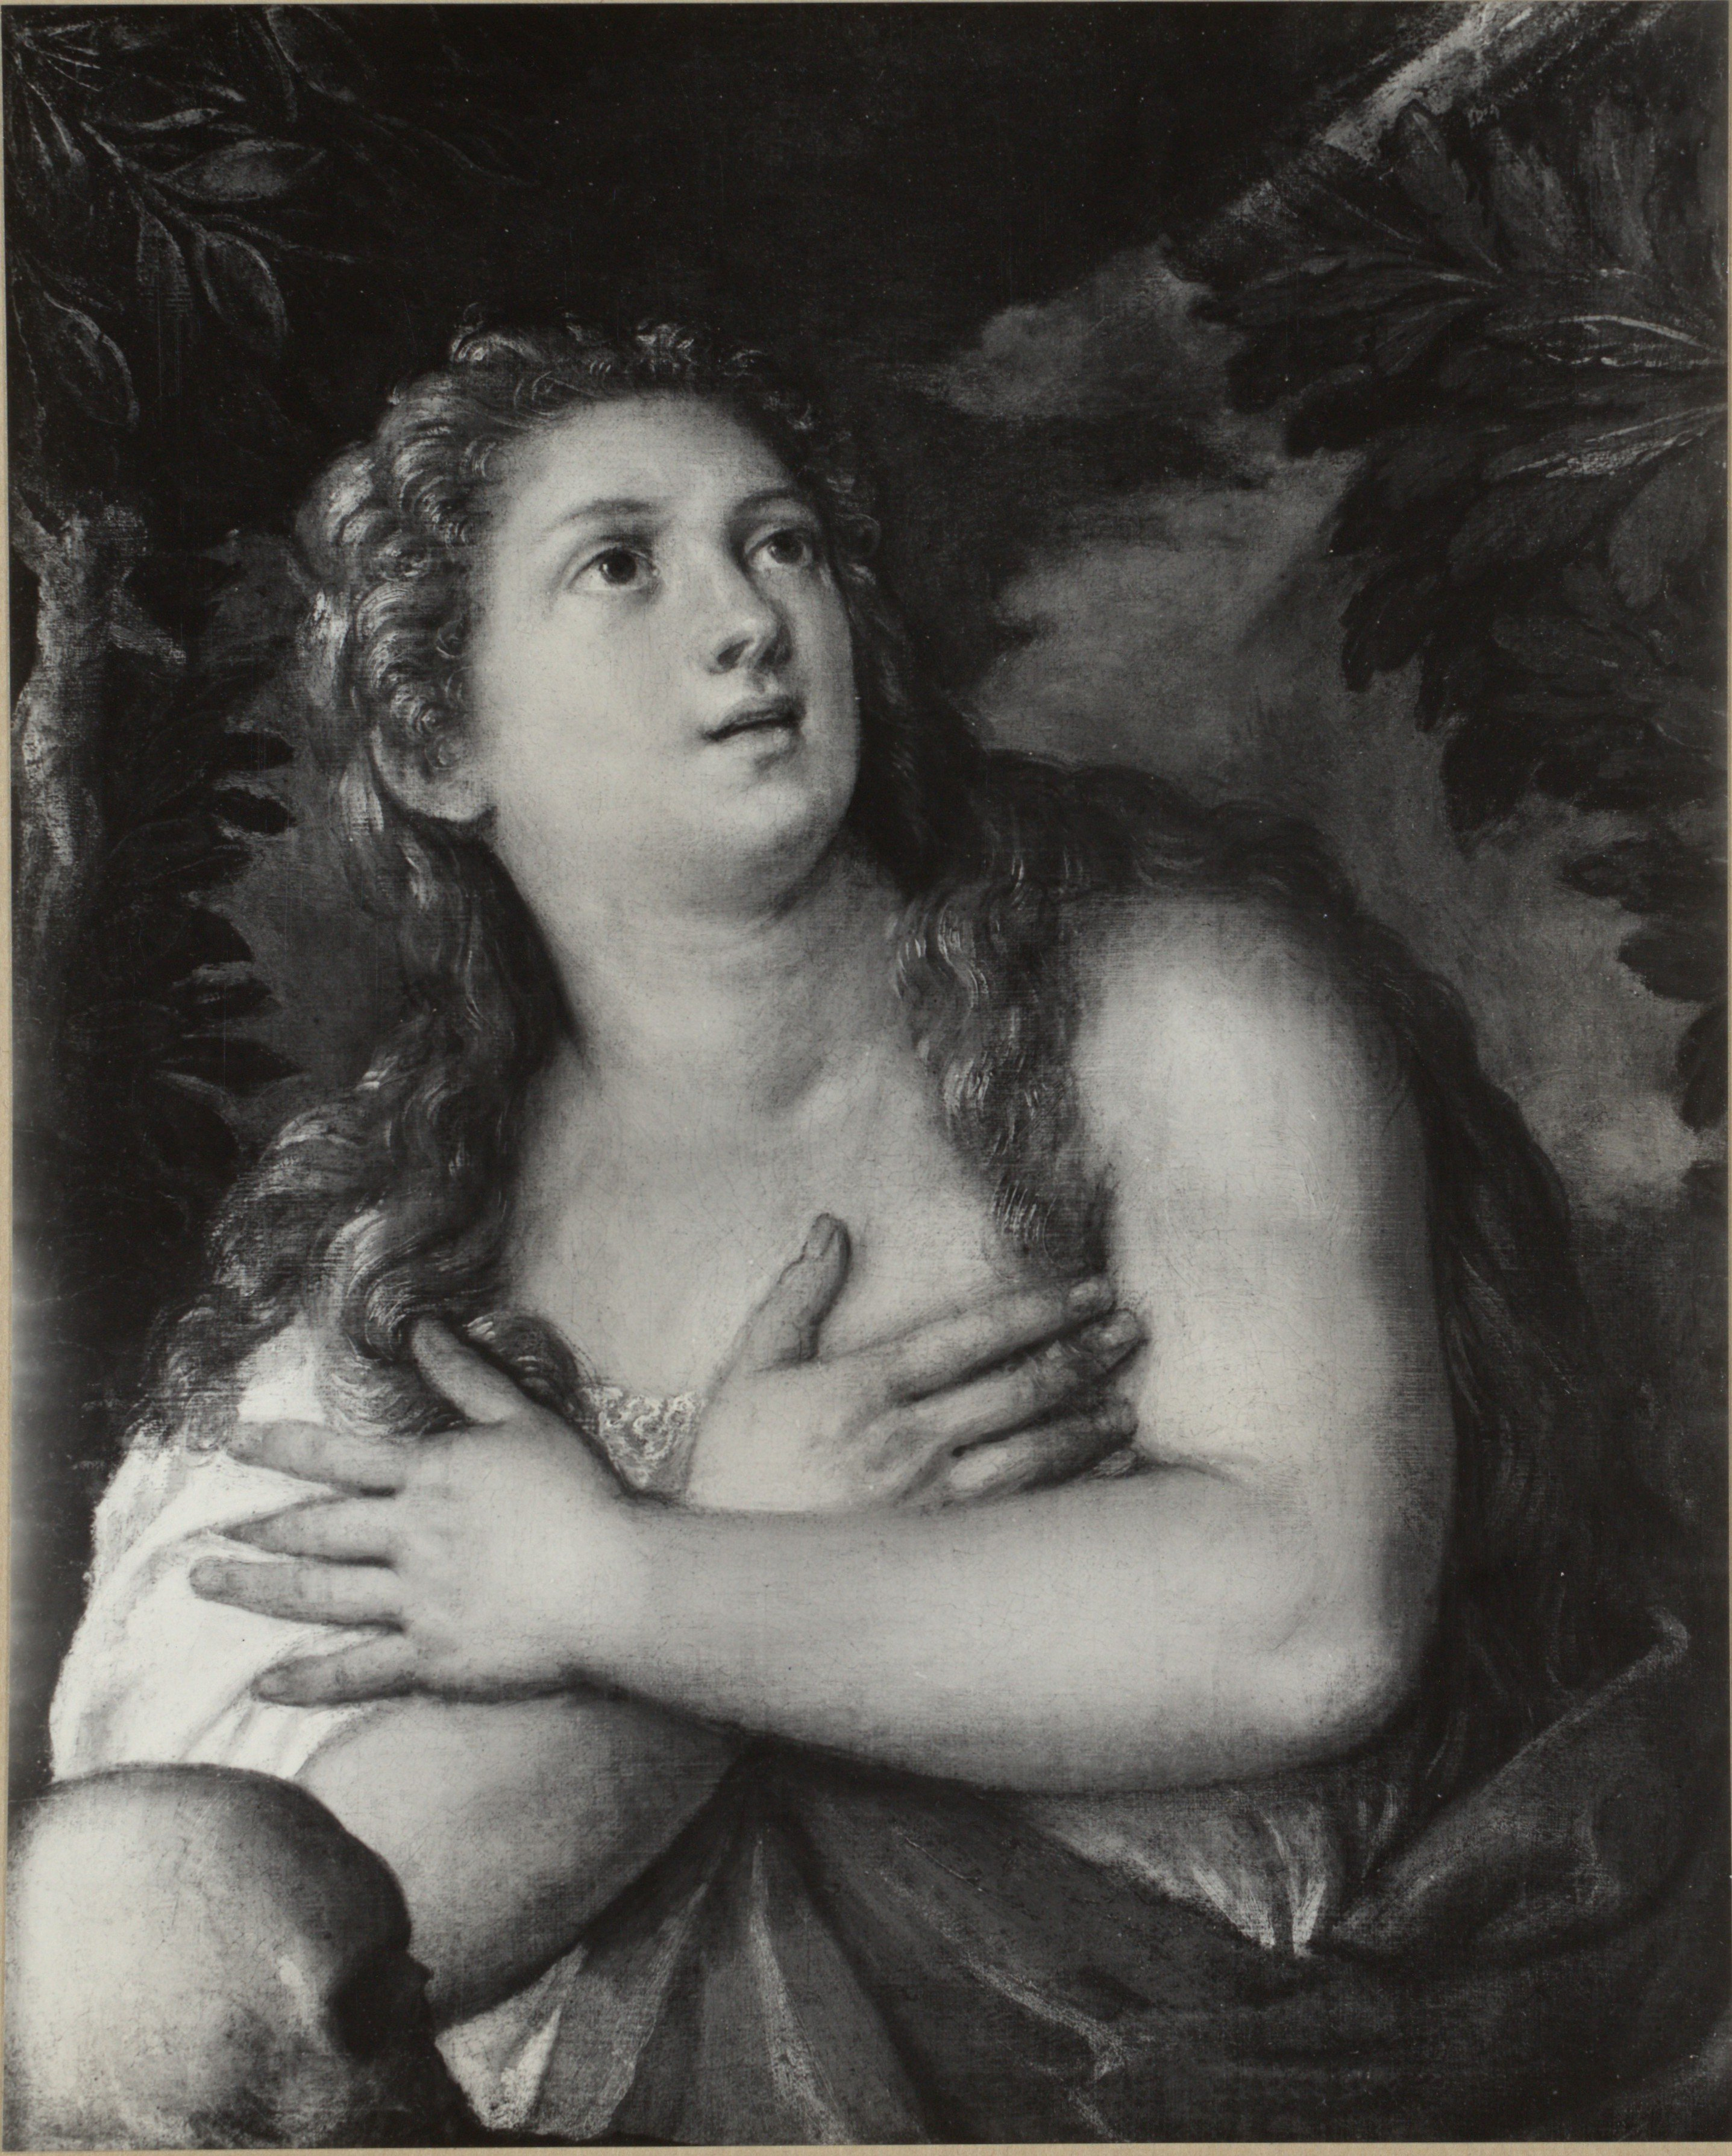

3 th most similar image according to model c1b9c7308e3347c6926f35cfab0f83de


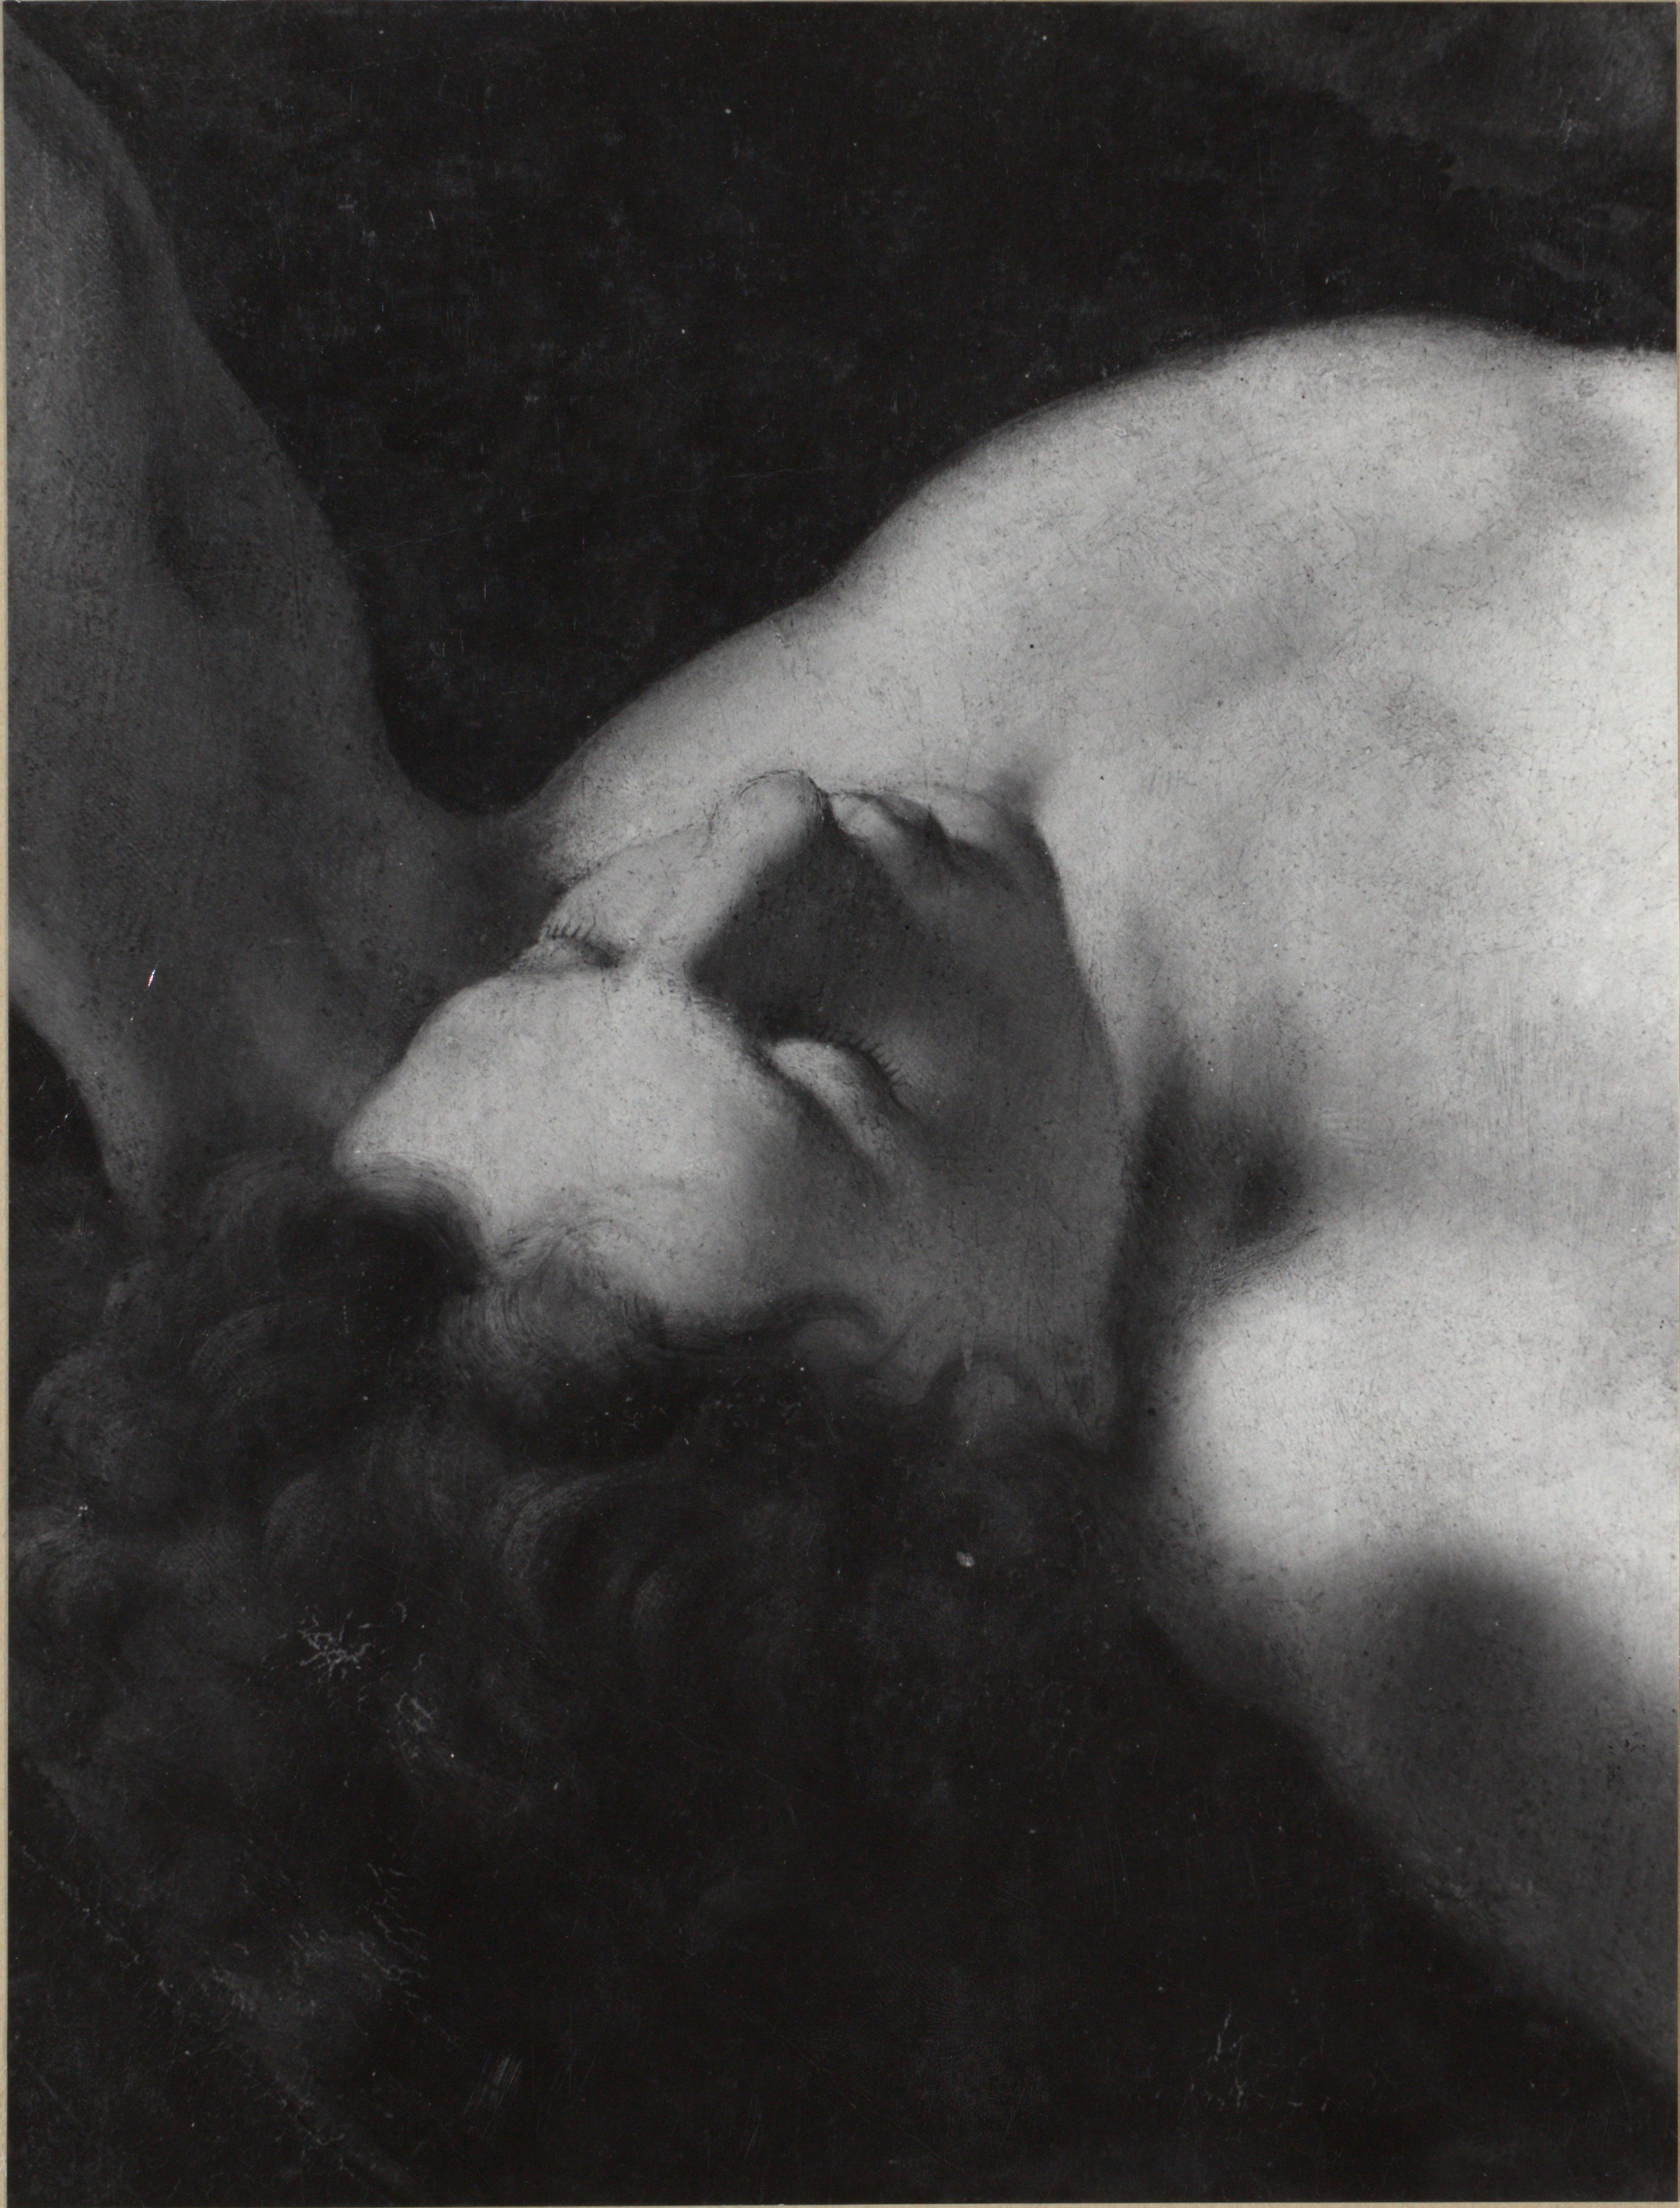

In [9]:
show_similars(train_test[train_test['set'] == 'test'][train_test['uid'].isin(list_downloaded)].sample(), embeddings, train_test, data)